# Minimal OpenSCM-Runner example with FaIR

Requires fair >= 1.6.0a3 and < 2.0.0

In [1]:
import openscm_runner

<IPython.core.display.Javascript object>

pyam - INFO: Running in a notebook, setting `pyam` logging level to `logging.INFO` and adding stderr handler
/Users/znicholls/Documents/AGCEC/MCastle/openscm-runner-zn/src/openscm_runner/run.py:6: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [2]:
# NBVAL_IGNORE_OUTPUT
print(openscm_runner.__version__)

0.1.0+14.gc0ff85a.dirty


In [3]:
import os.path

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pyam
from fair.forward import fair_scm
from fair.tools.scmdf import scmdf_to_emissions
from tqdm import tqdm_notebook

from openscm_runner.run import run
from openscm_runner.adapters import FAIR

In [4]:
fair = FAIR()

In [5]:
fair.get_version()

'1.6.0a5'

In [6]:
# NBVAL_IGNORE_OUTPUT
df = pd.read_csv(os.path.join('..', 'data', 'tiny_example_emissions_harmonized_infilled.csv'))
df = pyam.IamDataFrame(df)
df_clean = df.filter(variable="*Infilled*")
df_fair = df_clean.copy()
df_fair.head()

,model,scenario,region,variable,unit,year,value
216,model1,1point5,World,AR6 climate diagnostics|Infilled|Emissions|BC,Mt BC/yr,2015,9.727424
217,model1,1point5,World,AR6 climate diagnostics|Infilled|Emissions|BC,Mt BC/yr,2020,8.829266
218,model1,1point5,World,AR6 climate diagnostics|Infilled|Emissions|BC,Mt BC/yr,2030,6.982609
219,model1,1point5,World,AR6 climate diagnostics|Infilled|Emissions|BC,Mt BC/yr,2040,5.245301
220,model1,1point5,World,AR6 climate diagnostics|Infilled|Emissions|BC,Mt BC/yr,2050,4.110889


In [7]:
# NBVAL_IGNORE_OUTPUT
x = run(
    climate_models_cfgs={
            "FAIR": [{}],   # passing an empty list of an empty dict will run with defaults
        },
    scenarios=df_fair,
    output_variables=('Surface Temperature','Atmospheric Concentrations|CO2')
)

In [8]:
# NBVAL_IGNORE_OUTPUT
x.timeseries()

time                                                             1765-01-01  \
model  scenario region      variable                       unit               
model1 1point5  unspecified Atmospheric Concentrations|CO2 ppm   278.051553   
                            Surface Temperature            K       0.007659   
model2 1point5  unspecified Atmospheric Concentrations|CO2 ppm   278.051553   
       2point0  unspecified Atmospheric Concentrations|CO2 ppm   278.051553   
       1point5  unspecified Surface Temperature            K       0.007659   
       2point0  unspecified Surface Temperature            K       0.007659   

time                                                             1766-01-01  \
model  scenario region      variable                       unit               
model1 1point5  unspecified Atmospheric Concentrations|CO2 ppm   278.068544   
                            Surface Temperature            K       0.012668   
model2 1point5  unspecified Atmospheric Concentrations|CO2 ppm   278.068544   
       2point0  unspecified Atmospheric Concentrations|CO2 ppm   278.068544   
       1point5  unspecified Surface Temperature            K       0.012668   
       2point0  unspecified Surface Temperature            K       0.012668   

time                                                             1767-01-01  \
model  scenario region      variable                       unit               
model1 1point5  unspecified Atmospheric Concentrations|CO2 ppm   278.102421   
                            Surface Temperature            K       0.017054   
model2 1point5  unspecified Atmospheric Concentrations|CO2 ppm   278.102421   
       2point0  unspecified Atmospheric Concentrations|CO2 ppm   278.102421   
       1point5  unspecified Surface Temperature            K       0.017054   
       2point0  unspecified Surface Temperature            K       0.017054   

time                                                             1768-01-01  \
model  scenario region      variable                       unit               
model1 1point5  unspecified Atmospheric Concentrations|CO2 ppm   278.135909   
                            Surface Temperature            K       0.029563   
model2 1point5  unspecified Atmospheric Concentrations|CO2 ppm   278.135909   
       2point0  unspecified Atmospheric Concentrations|CO2 ppm   278.135909   
       1point5  unspecified Surface Temperature            K       0.029563   
       2point0  unspecified Surface Temperature            K       0.029563   

time                                                             1769-01-01  \
model  scenario region      variable                       unit               
model1 1point5  unspecified Atmospheric Concentrations|CO2 ppm   278.168867   
                            Surface Temperature            K       0.046535   
model2 1point5  unspecified Atmospheric Concentrations|CO2 ppm   278.168867   
       2point0  unspecified Atmospheric Concentrations|CO2 ppm   278.168867   
       1point5  unspecified Surface Temperature            K       0.046535   
       2point0  unspecified Surface Temperature            K       0.046535   

time                                                             1770-01-01  \
model  scenario region      variable                       unit               
model1 1point5  unspecified Atmospheric Concentrations|CO2 ppm   278.201383   
                            Surface Temperature            K       0.061923   
model2 1point5  unspecified Atmospheric Concentrations|CO2 ppm   278.201383   
       2point0  unspecified Atmospheric Concentrations|CO2 ppm   278.201383   
       1point5  unspecified Surface Temperature            K       0.061923   
       2point0  unspecified Surface Temperature            K       0.061923   

time                                                             1771-01-01  \
model  scenario region      variable                       unit               
model1 1point5  unspecified Atmospheric Conc

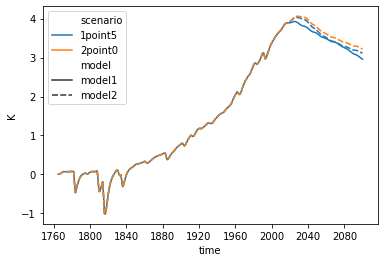

In [9]:
# NBVAL_IGNORE_OUTPUT
x.filter(variable="Surface Temperature").lineplot(hue="scenario", style="model")

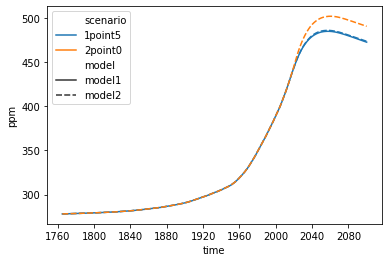

In [10]:
# NBVAL_IGNORE_OUTPUT
x.filter(variable="Atmospheric Concentrations|CO2").lineplot(hue="scenario", style="model")